In [261]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random


### Get Data

In [324]:
df_train = pd.read_csv('audio_data6_train.csv')
bird_df = df_train[df_train["breed"].notna()]
# Extract MFCC feature columns
X_train_val = bird_df.iloc[:,5:].values

# Convert labels to numeric numbers
y_train_val = bird_df["breed"].map({"wood_warbler": 0,"barn_swallow": 1,"meadow_pipit": 2,"common_wood_pigeon": 3,"marsh_warbler": 4,"common_house_martin": 5,"african_pied_wagtail": 6,"common_chiffchaff": 7,"common_moorhen": 8,"northern_lapwing": 9,"european_robin": 10,"dunnock": 11,"european_greenfinch": 12,"goldcrest": 13,"corn_bunting": 14,"great_spotted_woodpecker": 15,"red-throated_loon": 16,"european_green_woodpecker": 17,"eurasian_wryneck": 18,"eurasian_collared_dove": 19,"redwing": 20,"willow_tit": 21,"dunlin": 22,"common_redpoll": 23,"tawny_owl": 24,"eurasian_wren": 25,"eurasian_treecreeper": 26,"eurasian_skylark": 27,"common_redshank": 28,"eurasian_coot": 29,"grey_plover": 30,"black_woodpecker": 31,"grey_partridge": 32,"stock_dove": 33,"nan": 34,"western_jackdaw": 35,"rook": 36,"marsh_tit": 37,"yellowhammer": 38,"great_tit": 39,"european_nightjar": 40,"european_bee-eater": 41,"long-tailed_tit": 42,"european_golden_plover": 43,"common_redstart": 44,"garden_warbler": 45,"common_linnet": 46,"tree_pipit": 47,"common_swift": 48,"common_nightingale": 49,"river_warbler": 50,"willow_ptarmigan": 51,"european_goldfinch": 52,"european_herring_gull": 53,"common_pheasant": 54,"song_thrush": 55,"common_blackbird": 56,"western_yellow_wagtail": 57,"eurasian_tree_sparrow": 58,"house_sparrow": 59,"canada_goose": 60,"carrion_crow": 61,"common_chaffinch": 62,"eurasian_bullfinch": 63,"european_turtle_dove": 64,"red_crossbill": 65,"northern_raven": 66,"common_cuckoo": 67,"spotted_flycatcher": 68,"lesser_whitethroat": 69,"eurasian_oystercatcher": 70,"sedge_warbler": 71,"eurasian_magpie": 72,"european_honey_buzzard": 73,"rock_dove": 74,"eurasian_blackcap": 75,"common_reed_bunting": 76,"black-headed_gull": 77,"coal_tit": 78,"eurasian_reed_warbler": 79,"eurasian_golden_oriole": 80,"common_snipe": 81,"willow_warbler": 82,"eurasian_nuthatch": 83,"eurasian_jay": 84,"common_whitethroat": 85,"wood_sandpiper": 86,"eurasian_blue_tit": 87,"common_starling": 88}).values

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.17, random_state=42, stratify=y_train_val)


df_test = pd.read_csv('audio_data6_test.csv')
bird_test_df = df_test[df_test["breed"].notna()]
# Extract MFCC feature columns
X_test = bird_test_df.iloc[:,5:].values

# Convert labels to numeric numbers
y_test = bird_test_df["breed"].map({"wood_warbler": 0,"barn_swallow": 1,"meadow_pipit": 2,"common_wood_pigeon": 3,"marsh_warbler": 4,"common_house_martin": 5,"african_pied_wagtail": 6,"common_chiffchaff": 7,"common_moorhen": 8,"northern_lapwing": 9,"european_robin": 10,"dunnock": 11,"european_greenfinch": 12,"goldcrest": 13,"corn_bunting": 14,"great_spotted_woodpecker": 15,"red-throated_loon": 16,"european_green_woodpecker": 17,"eurasian_wryneck": 18,"eurasian_collared_dove": 19,"redwing": 20,"willow_tit": 21,"dunlin": 22,"common_redpoll": 23,"tawny_owl": 24,"eurasian_wren": 25,"eurasian_treecreeper": 26,"eurasian_skylark": 27,"common_redshank": 28,"eurasian_coot": 29,"grey_plover": 30,"black_woodpecker": 31,"grey_partridge": 32,"stock_dove": 33,"nan": 34,"western_jackdaw": 35,"rook": 36,"marsh_tit": 37,"yellowhammer": 38,"great_tit": 39,"european_nightjar": 40,"european_bee-eater": 41,"long-tailed_tit": 42,"european_golden_plover": 43,"common_redstart": 44,"garden_warbler": 45,"common_linnet": 46,"tree_pipit": 47,"common_swift": 48,"common_nightingale": 49,"river_warbler": 50,"willow_ptarmigan": 51,"european_goldfinch": 52,"european_herring_gull": 53,"common_pheasant": 54,"song_thrush": 55,"common_blackbird": 56,"western_yellow_wagtail": 57,"eurasian_tree_sparrow": 58,"house_sparrow": 59,"canada_goose": 60,"carrion_crow": 61,"common_chaffinch": 62,"eurasian_bullfinch": 63,"european_turtle_dove": 64,"red_crossbill": 65,"northern_raven": 66,"common_cuckoo": 67,"spotted_flycatcher": 68,"lesser_whitethroat": 69,"eurasian_oystercatcher": 70,"sedge_warbler": 71,"eurasian_magpie": 72,"european_honey_buzzard": 73,"rock_dove": 74,"eurasian_blackcap": 75,"common_reed_bunting": 76,"black-headed_gull": 77,"coal_tit": 78,"eurasian_reed_warbler": 79,"eurasian_golden_oriole": 80,"common_snipe": 81,"willow_warbler": 82,"eurasian_nuthatch": 83,"eurasian_jay": 84,"common_whitethroat": 85,"wood_sandpiper": 86,"eurasian_blue_tit": 87,"common_starling": 88}).values

In [336]:
df_train = pd.read_csv('audio_data6_train.csv')
bird_df = df_train[df_train["breed"].notna()]
# Extract MFCC feature columns
X = bird_df.iloc[:,5:].values

# Convert labels to numeric numbers
y = bird_df["breed"].map({"wood_warbler": 0,"barn_swallow": 1,"meadow_pipit": 2,"common_wood_pigeon": 3,"marsh_warbler": 4,"common_house_martin": 5,"african_pied_wagtail": 6,"common_chiffchaff": 7,"common_moorhen": 8,"northern_lapwing": 9,"european_robin": 10,"dunnock": 11,"european_greenfinch": 12,"goldcrest": 13,"corn_bunting": 14,"great_spotted_woodpecker": 15,"red-throated_loon": 16,"european_green_woodpecker": 17,"eurasian_wryneck": 18,"eurasian_collared_dove": 19,"redwing": 20,"willow_tit": 21,"dunlin": 22,"common_redpoll": 23,"tawny_owl": 24,"eurasian_wren": 25,"eurasian_treecreeper": 26,"eurasian_skylark": 27,"common_redshank": 28,"eurasian_coot": 29,"grey_plover": 30,"black_woodpecker": 31,"grey_partridge": 32,"stock_dove": 33,"nan": 34,"western_jackdaw": 35,"rook": 36,"marsh_tit": 37,"yellowhammer": 38,"great_tit": 39,"european_nightjar": 40,"european_bee-eater": 41,"long-tailed_tit": 42,"european_golden_plover": 43,"common_redstart": 44,"garden_warbler": 45,"common_linnet": 46,"tree_pipit": 47,"common_swift": 48,"common_nightingale": 49,"river_warbler": 50,"willow_ptarmigan": 51,"european_goldfinch": 52,"european_herring_gull": 53,"common_pheasant": 54,"song_thrush": 55,"common_blackbird": 56,"western_yellow_wagtail": 57,"eurasian_tree_sparrow": 58,"house_sparrow": 59,"canada_goose": 60,"carrion_crow": 61,"common_chaffinch": 62,"eurasian_bullfinch": 63,"european_turtle_dove": 64,"red_crossbill": 65,"northern_raven": 66,"common_cuckoo": 67,"spotted_flycatcher": 68,"lesser_whitethroat": 69,"eurasian_oystercatcher": 70,"sedge_warbler": 71,"eurasian_magpie": 72,"european_honey_buzzard": 73,"rock_dove": 74,"eurasian_blackcap": 75,"common_reed_bunting": 76,"black-headed_gull": 77,"coal_tit": 78,"eurasian_reed_warbler": 79,"eurasian_golden_oriole": 80,"common_snipe": 81,"willow_warbler": 82,"eurasian_nuthatch": 83,"eurasian_jay": 84,"common_whitethroat": 85,"wood_sandpiper": 86,"eurasian_blue_tit": 87,"common_starling": 88}).values

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.17, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.205, random_state=42, stratify=y_train_val)


In [341]:
len((y_train))

348

In [342]:
len((y_val))

90

In [343]:
len((y_test))

90

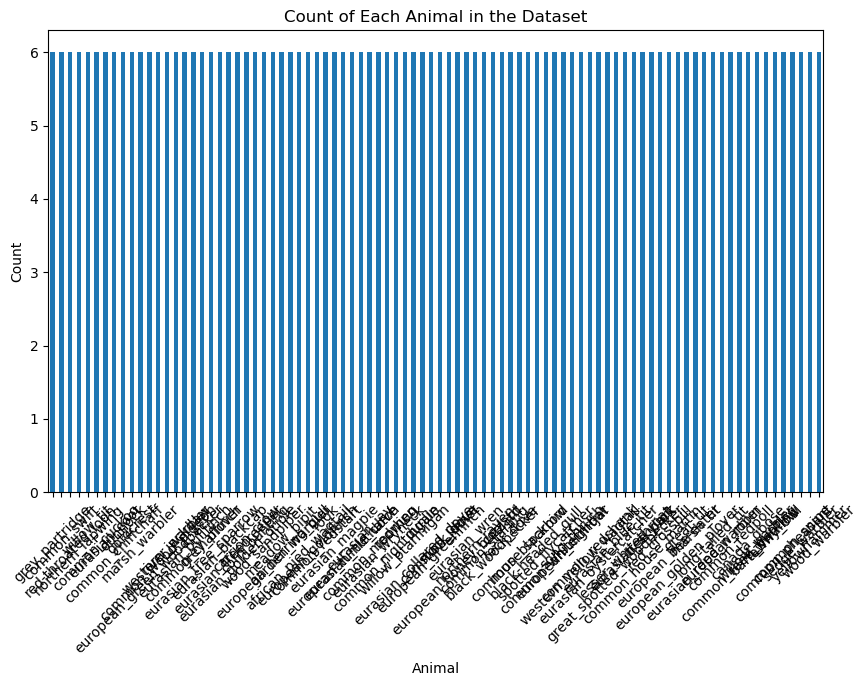

In [311]:
label_counts = bird_df['breed'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.xlabel('Animal')
plt.ylabel('Count')
plt.title('Count of Each Animal in the Dataset')
plt.xticks(rotation=45)
plt.show()

In [344]:
def reshape_mfcc(mfcc_vector, height=37, width=36):
    padded = np.pad(mfcc_vector, (0, height * width - len(mfcc_vector)), mode='constant')
    return padded.reshape(height, width)

# Reshape all MFCC data
X_train = np.array([reshape_mfcc(x) for x in X_train])
X_val = np.array([reshape_mfcc(x) for x in X_val])
X_test = np.array([reshape_mfcc(x) for x in X_test])

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [345]:
# Define Dataset class
class MFCCDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets
train_dataset = MFCCDataset(X_train_tensor, y_train_tensor)
val_dataset = MFCCDataset(X_val_tensor, y_val_tensor)
test_dataset = MFCCDataset(X_test_tensor, y_test_tensor)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### Create Model

In [346]:
class CNN_Audio2(nn.Module):
    def __init__(self):
        super(CNN_Audio2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  # Batch normalization

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # Batch normalization

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)  # Batch normalization

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)  # Increase dropout

        self.fc1 = nn.Linear(32 * 9 * 9, 64)  # Reduce fc layer size
        self.fc2 = nn.Linear(64, 89)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout before final layer
        x = self.fc2(x)
        return x

In [347]:
class CNN(nn.Module):
    def __init__(self, num_conv_layers, num_filters, kernel_size, dropout):
        super(CNN, self).__init__()
        layers = []
        in_channels = 1  # Since input has 1 channel

        for _ in range(num_conv_layers):
            layers.append(nn.Conv2d(in_channels, num_filters, kernel_size=kernel_size, padding=1))
            layers.append(nn.ReLU())
            layers.append(nn.MaxPool2d(2, 2))  # Halves the height & width
            in_channels = num_filters

        self.conv = nn.Sequential(*layers)

        # Compute the flattened size dynamically
        dummy_input = torch.randn(1, 1, 37, 36)
        with torch.no_grad():
            output_size = self.conv(dummy_input).view(1, -1).shape[1]

        self.fc = nn.Sequential(
            nn.Linear(output_size, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 89)  # Assuming 89 output classes
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)  # Flatten before passing to FC layer
        x = self.fc(x)
        return x

### Random Search

In [268]:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.0001],
    'batch_size': [16, 32, 64],
    'num_conv_layers': [2, 3, 4, 5],
    'kernel_sizes': [(2,2), (3, 3)],
    'num_filters': [16, 32, 64, 128, 256],
    'dropout': [0.3, 0.5, 0.7],
    'optimizer': ['adam', 'sgd']
}

def sample_hyperparameters():
    return {k: random.choice(v) for k, v in param_grid.items()}

In [ ]:
def train_and_evaluate(hyperparams, train_loader, test_loader, device, early_stopping_patience=3):
    model = CNN(
        num_conv_layers=hyperparams['num_conv_layers'],
        num_filters=hyperparams['num_filters'],
        kernel_size=hyperparams['kernel_sizes'],
        dropout=hyperparams['dropout']
    ).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=hyperparams['learning_rate']) \
        if hyperparams['optimizer'] == 'adam' else optim.SGD(model.parameters(), lr=hyperparams['learning_rate'])

    best_accuracy = 0.0
    epochs_without_improvement = 0

    for epoch in range(30):  # Train for a maximum of 30 epochs
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Evaluate on validation set
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total

        # Check for early stopping
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= early_stopping_patience:
            print(f'Early stopping at epoch {epoch+1} with best validation accuracy: {best_accuracy}')
            break

    return best_accuracy

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_hyperparams = None
best_accuracy = 0

for _ in range(20):  # Run 10 random trials
    hyperparams = sample_hyperparameters()
    accuracy = train_and_evaluate(hyperparams, train_loader, test_loader, device)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparams = hyperparams

    print(f"Trial: {hyperparams}, Accuracy: {accuracy:.4f}")

print(f"Best Hyperparameters: {best_hyperparams}, Best Accuracy: {best_accuracy:.4f}")


### Train Model

In [348]:
best_hyperparams = {  # Replace with your best hyperparams
    'learning_rate': 0.001,
    'batch_size': 32,
    'num_conv_layers': 2,
    'kernel_sizes': (2, 2),
    'num_filters': 64,
    'dropout': 0.5,
    'optimizer': 'adam'
}

early_stopping_patience=3

def train_final_model(hyperparams, train_loader, test_loader, device, epochs=10):
    model = CNN(
        num_conv_layers=hyperparams['num_conv_layers'],
        num_filters=hyperparams['num_filters'],
        kernel_size=hyperparams['kernel_sizes'],
        dropout=hyperparams['dropout']
    ).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=hyperparams['learning_rate']) \
        if hyperparams['optimizer'] == 'adam' else optim.SGD(model.parameters(), lr=hyperparams['learning_rate'])
    

    best_accuracy = 0.0
    epochs_without_improvement = 0

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch}, Loss: {total_loss / len(train_loader)}")

        # Evaluate on validation set
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total

        # Check for early stopping
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= early_stopping_patience:
            print(f'Early stopping at epoch {epoch+1} with best validation accuracy: {best_accuracy}')
            break

    return model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
final_model = train_final_model(best_hyperparams, train_loader, test_loader, device, epochs=100)


Epoch 0, Loss: 4.52201526815241
Epoch 1, Loss: 4.485587770288641
Epoch 2, Loss: 4.46645584973422
Epoch 3, Loss: 4.424132997339422
Epoch 4, Loss: 4.361321839419278
Epoch 5, Loss: 4.233683629469438
Epoch 6, Loss: 4.056986527009443
Epoch 7, Loss: 3.9016568660736084
Epoch 8, Loss: 3.75034761428833
Epoch 9, Loss: 3.493622368032282
Epoch 10, Loss: 3.2548967491496694
Epoch 11, Loss: 3.071723287755793
Epoch 12, Loss: 2.8576243790713223
Epoch 13, Loss: 2.803364558653398
Epoch 14, Loss: 2.606886711987582
Epoch 15, Loss: 2.393700274554166
Epoch 16, Loss: 2.2817783897573296
Epoch 17, Loss: 2.2300340587442573
Epoch 18, Loss: 2.175852959806269
Epoch 19, Loss: 1.9698551134629683
Epoch 20, Loss: 1.7906941825693303
Epoch 21, Loss: 1.682709282094782
Epoch 22, Loss: 1.6820356303995305
Epoch 23, Loss: 1.462566527453336
Epoch 24, Loss: 1.4396603324196555
Epoch 25, Loss: 1.3880650184371255
Early stopping at epoch 26 with best validation accuracy: 0.7444444444444445


In [272]:
# model = CNN_Audio2()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# num_epochs = 50
# train_losses = []
# val_losses = []

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0

#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs).squeeze(1)  # Ensure outputs are of shape [batch_size]
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()

#     train_losses.append(running_loss / len(train_loader))

#     # Validation loss
#     model.eval()
#     val_loss = 0.0
#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             outputs = model(inputs).squeeze(1)
#             loss = criterion(outputs, labels)
#             val_loss += loss.item()
#     val_losses.append(val_loss / len(test_loader))

#     print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_losses[-1]}, Validation Loss: {val_losses[-1]}")

# print("Training complete!")


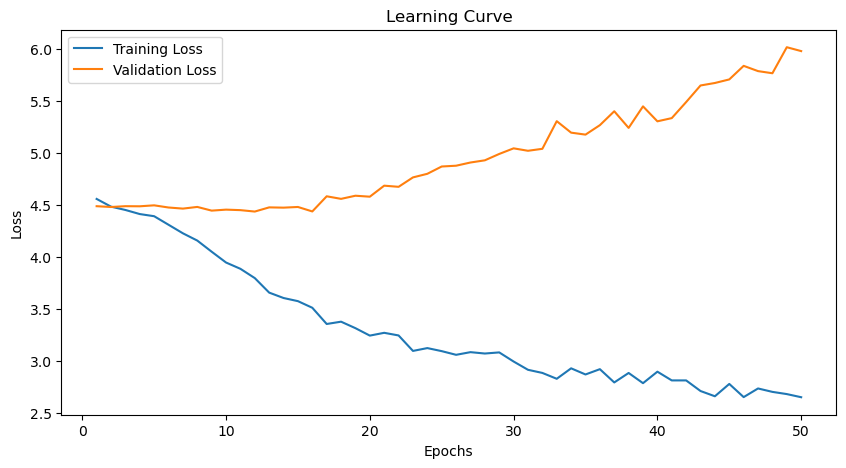

In [273]:
# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [274]:
# class CNN_Audio2(nn.Module):
#     def __init__(self, input_shape=(1, 36, 36), conv1_out=32, conv2_out=64, conv3_out=64, 
#                  pool_type='max', dropout_rate=0.5, fc1_out=512):
#         super(CNN_Audio2, self).__init__()
        
#         # First convolutional layer
#         self.conv1 = nn.Conv2d(1, conv1_out, kernel_size=3, stride=1, padding=1)
        
#         # Second convolutional layer
#         self.conv2 = nn.Conv2d(conv1_out, conv2_out, kernel_size=3, stride=1, padding=1)
        
#         # Third convolutional layer
#         self.conv3 = nn.Conv2d(conv2_out, conv3_out, kernel_size=3, stride=1, padding=1)
        
#         # Max Pooling layer or Average Pooling depending on the parameter
#         if pool_type == 'max':
#             self.pool = nn.MaxPool2d(2, 2)
#         elif pool_type == 'avg':
#             self.pool = nn.AvgPool2d(2, 2)
        
#         # Flatten the tensor after convolutions and pooling
#         self.flattened_size = self._get_flattened_size(input_shape)
        
#         # Fully connected layers
#         self.fc1 = nn.Linear(self.flattened_size, fc1_out)
#         self.fc2 = nn.Linear(fc1_out, 10)  # Adjust the output size (89) for your task
    
#         # Dropout layer for regularization
#         self.dropout = nn.Dropout(p=dropout_rate)

#     def _get_flattened_size(self, input_shape):
#         """Helper function to calculate flattened size after convolutional and pooling layers."""
#         # Create a dummy tensor to simulate the input and pass it through the layers
#         x = torch.zeros(1, *input_shape)
        
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
        
#         # If there's a third layer, apply it
#         if hasattr(self, 'conv3'):
#             x = self.pool(torch.relu(self.conv3(x)))
        
#         return x.numel()  # Total number of elements in the tensor

#     def forward(self, x):
#         """Forward pass through the network."""
#         # Apply convolutional layers with ReLU activation
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
        
#         if hasattr(self, 'conv3'):
#             x = self.pool(torch.relu(self.conv3(x)))
        
#         # Flatten the tensor
#         x = x.view(x.size(0), -1)
        
#         # Apply fully connected layers with ReLU activation and dropout
#         x = torch.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.fc2(x)
        
#         return x

# # Best Parameters
# best_params = {
#     'num_conv_layers': 3,    # Number of convolutional layers
#     'conv1_out': 64,         # Output channels for the first conv layer
#     'conv2_out': 64,         # Output channels for the second conv layer
#     'conv3_out': 64,         # Output channels for the third conv layer
#     'pool_type': 'avg',      # Pooling type
#     'dropout': 0.2,          # Dropout rate
#     'fc_units': 128,         # Fully connected layer units
#     'lr': 0.0001,            # Learning rate
#     'batch_size': 128,       # Batch size
#     'optimizer': 'SGD'       # Optimizer
# }

# # Instantiate the model
# model = CNN_Audio2(
#     conv1_out=best_params['conv1_out'], 
#     conv2_out=best_params['conv2_out'], 
#     conv3_out=best_params['conv3_out'], 
#     pool_type=best_params['pool_type'], 
#     dropout_rate=best_params['dropout'], 
#     fc1_out=best_params['fc_units']
# )

# # Choose the optimizer based on the parameter
# optimizer_name = best_params['optimizer']
# lr = best_params['lr']

# if optimizer_name == "Adam":
#     optimizer = optim.Adam(model.parameters(), lr=lr)
# else:
#     optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# # Print the model architecture
# print(model)

In [275]:
# criterion = nn.CrossEntropyLoss()

# # Training loop
# num_epochs = 30
# train_losses = []
# val_losses = []

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0

#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)  # Ensure outputs are of shape [batch_size]
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()

#     train_losses.append(running_loss / len(train_loader))

#     # Validation loss
#     model.eval()
#     val_loss = 0.0
#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             val_loss += loss.item()
#     val_losses.append(val_loss / len(test_loader))

#     print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_losses[-1]}, Validation Loss: {val_losses[-1]}")

# print("Training complete!")

In [349]:
final_model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = final_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy}")


Test Accuracy: 0.7333333333333333


In [350]:
final_model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = final_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Val Accuracy: {accuracy}")


Val Accuracy: 0.7444444444444445


In [351]:
final_model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = final_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Train Accuracy: {accuracy}")


Train Accuracy: 0.8764367816091954
